# Imersão de Dados Alura
## Desafios Aula 01 (19/10/2020)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


## Desafio01: Proporção dos inscritos por idade.

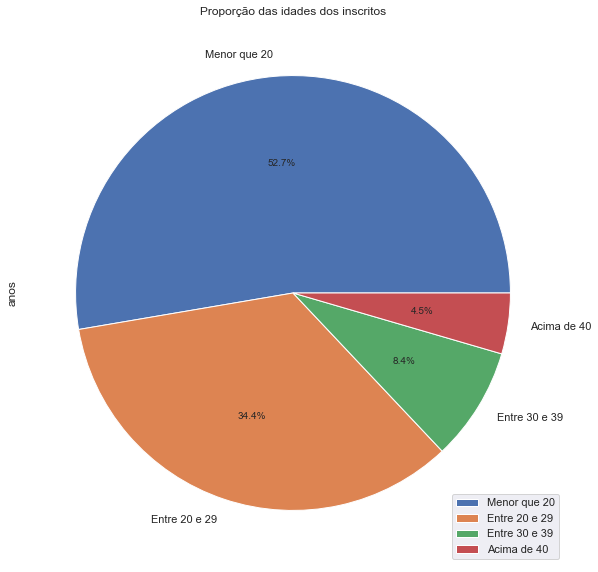

In [11]:
total_inscritos = len(dados["NU_IDADE"])

abaixo_vinte = dados.query("NU_IDADE < 20")["NU_IDADE"].value_counts().sort_index()
acima_vinte = dados.query("NU_IDADE >= 20 and NU_IDADE < 30")["NU_IDADE"].value_counts().sort_index()
acima_trinta = dados.query("NU_IDADE >= 30 and NU_IDADE < 40")["NU_IDADE"].value_counts().sort_index()
acima_quarenta = dados.query("NU_IDADE >= 40")["NU_IDADE"].value_counts().sort_index()

def soma(lista):
  soma = 0
  for item in lista:
    soma = soma + item
  return soma

idades_contado_ordenado = [soma(abaixo_vinte), soma(acima_vinte), soma(acima_trinta), soma(acima_quarenta)]

i = 0
proporcao = []
while i < len(idades_contado_ordenado):
  proporcao.append( (idades_contado_ordenado[i] * 100) / total_inscritos )
  i = i + 1

df = pd.DataFrame(
    {
        'anos': proporcao
     }, 
     index = ['Menor que 20', 'Entre 20 e 29', 'Entre 30 e 39', 'Acima de 40'])

df.plot.pie(title="Proporção das idades dos inscritos", autopct='%1.1f%%', y='anos', figsize=(10, 10))

In [9]:
len(idades_contado_ordenado)

4

## Desafio02: Descobrir de quais estados são os inscritos com 13 anos

In [14]:
dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA'].value_counts()

AP    1
MT    1
BA    1
SP    1
Name: SG_UF_RESIDENCIA, dtype: int64

## Desafio03: Adicionar título ao gráfico

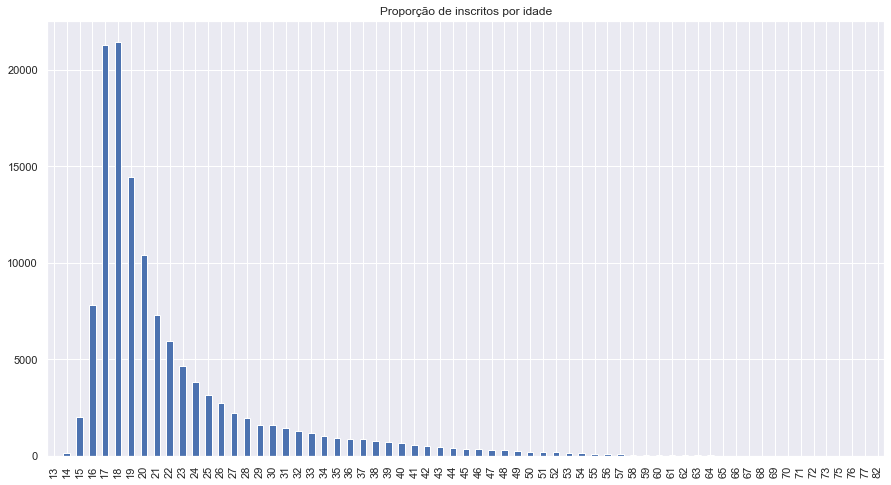

In [18]:
dados_idade = dados['NU_IDADE'].value_counts().sort_index()

grafico = dados_idade.plot(kind = 'bar', figsize = (15,8)).set_title('Proporção de inscritos por idade')

## Desafio04: Plotar os histogramas das idades dos treineiros e não treineiros

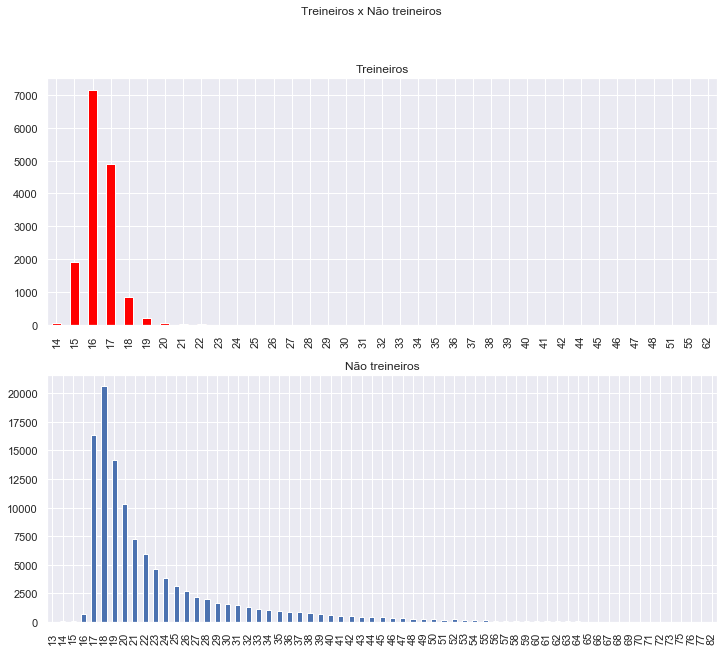

In [38]:
treineiros = dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()
nao_treineiros = dados.query("IN_TREINEIRO == 0")["NU_IDADE"].value_counts().sort_index()

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(12,10))
treineiros.plot.bar(ax = axes[0],subplots=True,title = "Treineiros x Não treineiros", label="Treineiros", color = 'red')
nao_treineiros.plot.bar(ax = axes[1],subplots=True, label = "Não treineiros")

plt.show()

## Desafio05: Plotar as distribuições das provas em inglês e espanhol

([<matplotlib.patches.Wedge at 0x230dcac5d08>,
 [Text(-0.0922181557888693, 1.196451341151365, 'Espanhol'),
  Text(0.08453320678825893, -1.0967470706366593, 'Inglês')],
 [Text(-0.05379392421017375, 0.6979299490049629, '52.4%'),
  Text(0.046109021884504865, -0.5982256748927233, '47.6%')])

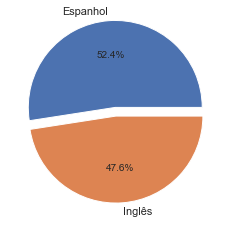

In [42]:
plt.pie(dados['TP_LINGUA'].value_counts(), labels=['Espanhol', 'Inglês'], autopct='%1.1f%%', explode=(0.1,0))

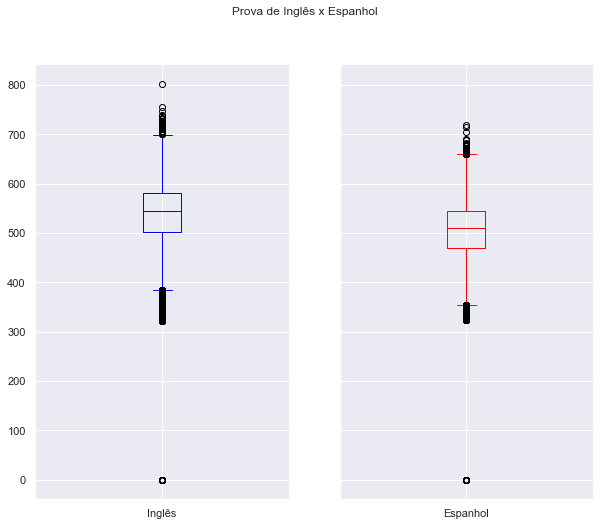

In [50]:
provas = [prova_ingles, prova_espanhol]

prova_ingles = dados.query('TP_LINGUA == 0')['NU_NOTA_LC']
prova_espanhol = dados.query('TP_LINGUA == 1')['NU_NOTA_LC']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8),sharey=True)
prova_ingles.plot.box(ax = axes[0], subplots=True, 
                      title = 'Prova de Inglês x Espanhol', label='Inglês', color='blue')
prova_espanhol.plot.box(ax = axes[1], subplots=True, label = 'Espanhol', color='red')
plt.show()

## Desafio06: Explorar a documentação e visualizações do matplotlib

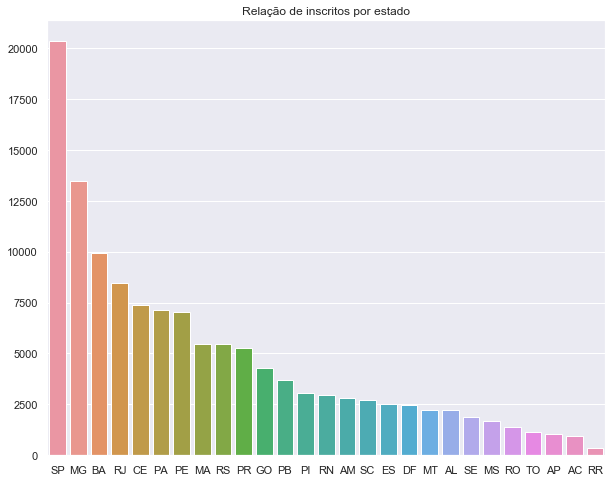

In [69]:
prova_por_estado = dados['SG_UF_PROVA'].value_counts().sort_values(ascending = False)
plt.figure(figsize=(10,8))
#prova_por_estado.plot.bar()
plt.title('Relação de inscritos por estado')
sns.barplot(x=prova_por_estado.index, y=prova_por_estado.values)